# Tranfer Learnning to Flower Recognition using PyTorch 🔥
This dataset contains labeled 4242 images of flowers.


### Content
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.

For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. Photos are not reduced to a single size, they have different proportions!

## Data
You can download data from: [Flowers Recognition Dataset](https://www.kaggle.com/datasets/alxmamaev/flowers-recognition)

In [64]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
path="./"
os.listdir(path)

['.config', 'flowers', 'archive.zip', 'sample_data']

In [65]:
!unzip archive.zip

Archive:  archive.zip
replace flowers/daisy/100080576_f52e8ee070_n.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
replace flowers/daisy/10140303196_b88d3d6cec.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
replace flowers/daisy/10172379554_b296050f82_n.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: [y]
error:  invalid response [[y]]
replace flowers/daisy/10172379554_b296050f82_n.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
replace flowers/daisy/10172567486_2748826a8b.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1

In [66]:
path="./flowers"
os.listdir(path)

['sunflower', 'rose', 'daisy', 'tulip', 'dandelion']

In [67]:
classes=['dandelion', 'daisy', 'sunflower', 'tulip', 'rose']

In [68]:
#CONTEO DE IMAGENES EN EL ARCHIVO LA CUAL DIFIERE DE LO INDICADO
#EN EL ENCABEZADO (4317 IMAGENES)
img_type = ('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')
img_qty = sum([len(files) for r, d, files in os.walk(path)
                   if any(file.lower().endswith(img_type) for file in files)])

print(f"Número de imagenes: {img_qty}")

Número de imagenes: 4317


In [69]:
label_of_file=[]
img_list=[]

for kind in classes:
    kind_parh=os.path.join(path,kind)

    for img in os.listdir(kind_parh):
        img_list.append(os.path.join(kind_parh,img))
        label_of_file.append(kind)

df=pd.DataFrame({'img':img_list,'label':label_of_file})
df.head(3)
df = df.sample(frac=1).reset_index(drop=True)
df.head(2)

,img,label
0,./flowers/rose/27619697563_228f5c4677_n.jpg,rose
1,./flowers/dandelion/4514343281_26781484df.jpg,dandelion


In [70]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['encode_label'] = encoder.fit_transform(df['label'])

In [71]:
df.head(10)

,img,label,encode_label
0,./flowers/rose/27619697563_228f5c4677_n.jpg,rose,2
1,./flowers/dandelion/4514343281_26781484df.jpg,dandelion,1
2,./flowers/daisy/144076848_57e1d662e3_m.jpg,daisy,0
3,./flowers/rose/18464084356_0d2d93f896_n.jpg,rose,2
4,./flowers/tulip/21083449726_2895661dfb_n.jpg,tulip,4
5,./flowers/dandelion/2478018280_1be353ca8c_m.jpg,dandelion,1
6,./flowers/dandelion/33881308394_738a121eb3_n.jpg,dandelion,1
7,./flowers/tulip/17706953166_cc21734d26_n.jpg,tulip,4
8,./flowers/tulip/8585103457_d64697c3cf_n.jpg,tulip,4
9,./flowers/daisy/6089825811_80f253fbe1.jpg,daisy,0


In [72]:
import cv2
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models

In [73]:
example_img = cv2.imread(df['img'][2])
example_img = cv2.cvtColor(example_img, cv2.COLOR_BGR2RGB) #SE CONVIERTE A FORMATO RGB POR USO DE CNN RESNET18
example_img.shape

(240, 199, 3)

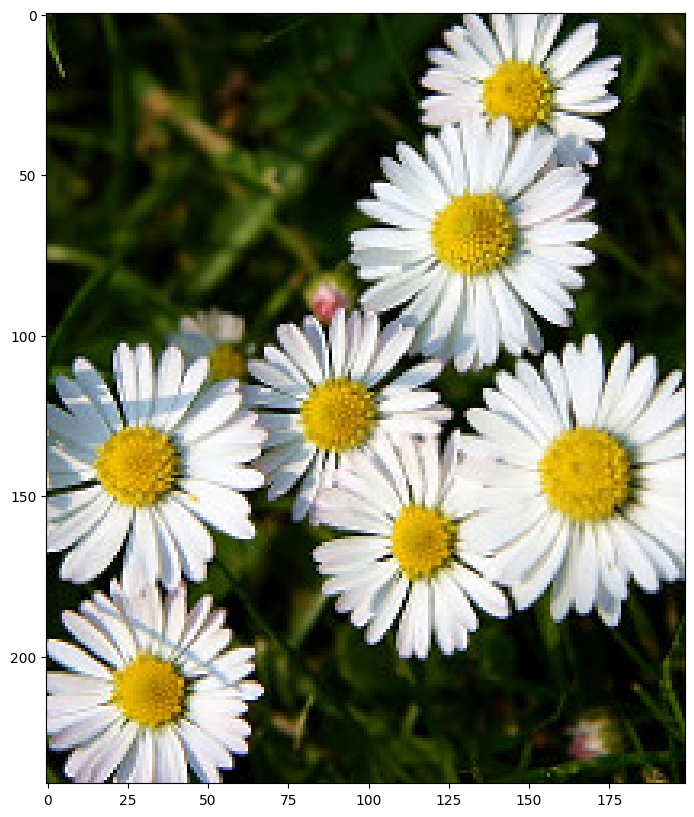

In [74]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(example_img)
plt.show()

In [75]:
import numpy as np
x=[]
for img in df['img']:
    try:
        img = cv2.imread(img)
        img = cv2.resize(img, (224, 224)) #SE MODIFICA TAMAÑO DE IMAGEN A 224x224 POR USO DE CNN RESNET18
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #SE CONVIERTE A FORMATO RGB POR USO DE CNN RESNET18
        img = img / 255.0  # normalize
        x.append(img)      # img

    except:
        print(f"Error loading image: {img}")

## Modeling

In [76]:
# using dataloader
X_train = DataLoader(x, batch_size=32, shuffle=True)
y_train = DataLoader(df['encode_label'], batch_size=32, shuffle=True)

In [77]:
# make model
model = models.resnet18(pretrained=True)
for param in model.parameters():#EVITA QUE LOS PESOS REENTRENADOS DEL MODELO RESNET18 SE ACTUALICEN
    param.requires_grad = False
num_ftrs = model.fc.in_features
model.fc = torch.nn.Linear(num_ftrs, 5)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [78]:
# train Model
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [79]:
# train model
def train_model(model, criterion, optimizer, num_epochs=25):
  model.train()
  # Cast the model weights to double precision (float64)
  model = model.double()
  for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, labels in zip(X_train, y_train):
      optimizer.zero_grad()
      # Permute the dimensions of the input tensor
      inputs = inputs.permute(0, 3, 1, 2) # Change the order of dimensions from [batch_size, height, width, channels] to [batch_size, channels, height, width]
      # Cast the inputs to double precision (float64)
      inputs = inputs.double()
      outputs = model(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()
      running_loss += loss.item() * inputs.size(0)
      print(f"Epoch {epoch+1}/{num_epochs} Loss: {running_loss/len(X_train)}")

In [80]:
# Test Model
def test_model(model):
  model.eval()
  test_loss = 0.0
  correct = 0
  with torch.no_grad():
    for inputs, labels in zip(X_train, y_train):
      # Permute the dimensions of the input tensor
      inputs = inputs.permute(0, 3, 1, 2) # Change the order of dimensions from [batch_size, height, width, channels] to [batch_size, channels, height, width]
      outputs = model(inputs)
      test_loss += criterion(outputs, labels).item() * inputs.size(0)
      pred = outputs.argmax(dim=1, keepdim=True)
      correct += pred.eq(labels.view_as(pred)).sum().item()
  test_loss /= len(X_train.dataset)
  test_accuracy = 100. * correct / len(X_train.dataset)
  print(f'Test set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(X_train.dataset)} ({test_accuracy:.0f}%)')

In [81]:
torch.cuda.is_available()#NO SE USA GPU POR RESTRICCIONES DE COLAB

False

In [82]:
# training
train_model(model, criterion, optimizer, num_epochs=25)

Epoch 1/25 Loss: 0.39779827033490645
Epoch 1/25 Loss: 0.8079962807804928
Epoch 1/25 Loss: 1.183359913723978
Epoch 1/25 Loss: 1.5931191034120342
Epoch 1/25 Loss: 1.963349661315981
Epoch 1/25 Loss: 2.366934975794523
Epoch 1/25 Loss: 2.7413545516162103
Epoch 1/25 Loss: 3.120248921431579
Epoch 1/25 Loss: 3.5125068098078573
Epoch 1/25 Loss: 3.921328344369638
Epoch 1/25 Loss: 4.316315509076031
Epoch 1/25 Loss: 4.69857471380126
Epoch 1/25 Loss: 5.085617404475863
Epoch 1/25 Loss: 5.531971226090676
Epoch 1/25 Loss: 5.951199795573118
Epoch 1/25 Loss: 6.349895938592236
Epoch 1/25 Loss: 6.7536810404979395
Epoch 1/25 Loss: 7.15963789486475
Epoch 1/25 Loss: 7.541801786010514
Epoch 1/25 Loss: 7.95283253899882
Epoch 1/25 Loss: 8.361873120848701
Epoch 1/25 Loss: 8.763068564650066
Epoch 1/25 Loss: 9.137293049221345
Epoch 1/25 Loss: 9.53904129401533
Epoch 1/25 Loss: 9.946884613854692
Epoch 1/25 Loss: 10.315274310277134
Epoch 1/25 Loss: 10.67566770173919
Epoch 1/25 Loss: 11.064197292994319
Epoch 1/25 Loss

KeyboardInterrupt: 